In [2]:
import pandas as pd

In [4]:
주택 = pd.read_csv("housing.csv")

In [5]:
주택.info() #판다스 형태로 읽어들일 경우 데이터 프레임 형태로 생성됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
주택.describe() #기술 통계 형태로 보여줌 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
!pip install matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.6 MB 1.3 MB/s eta 0:00:06
     - -------------------------------------- 0.2/7.6 MB 2.4 MB/s eta 0:00:04
     - -------------------------------------- 0.3/7.6 MB 2.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.4/7.6 MB 2.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.6 MB 2.0 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/7.6 MB 2.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/7.6 MB 2.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.7/7.6 MB 2.0 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/7.6 MB 1.9 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/7.6 MB 1.8 MB/s eta 0:00:04
     ---- ----------------------------------- 0.9/7.6 MB 1.7 MB/s eta 0:00:04
     ---- ----------------------------------- 0.9/7.6 MB 1.6 MB/s eta 0

In [11]:
import matplotlib.pyplot as plt

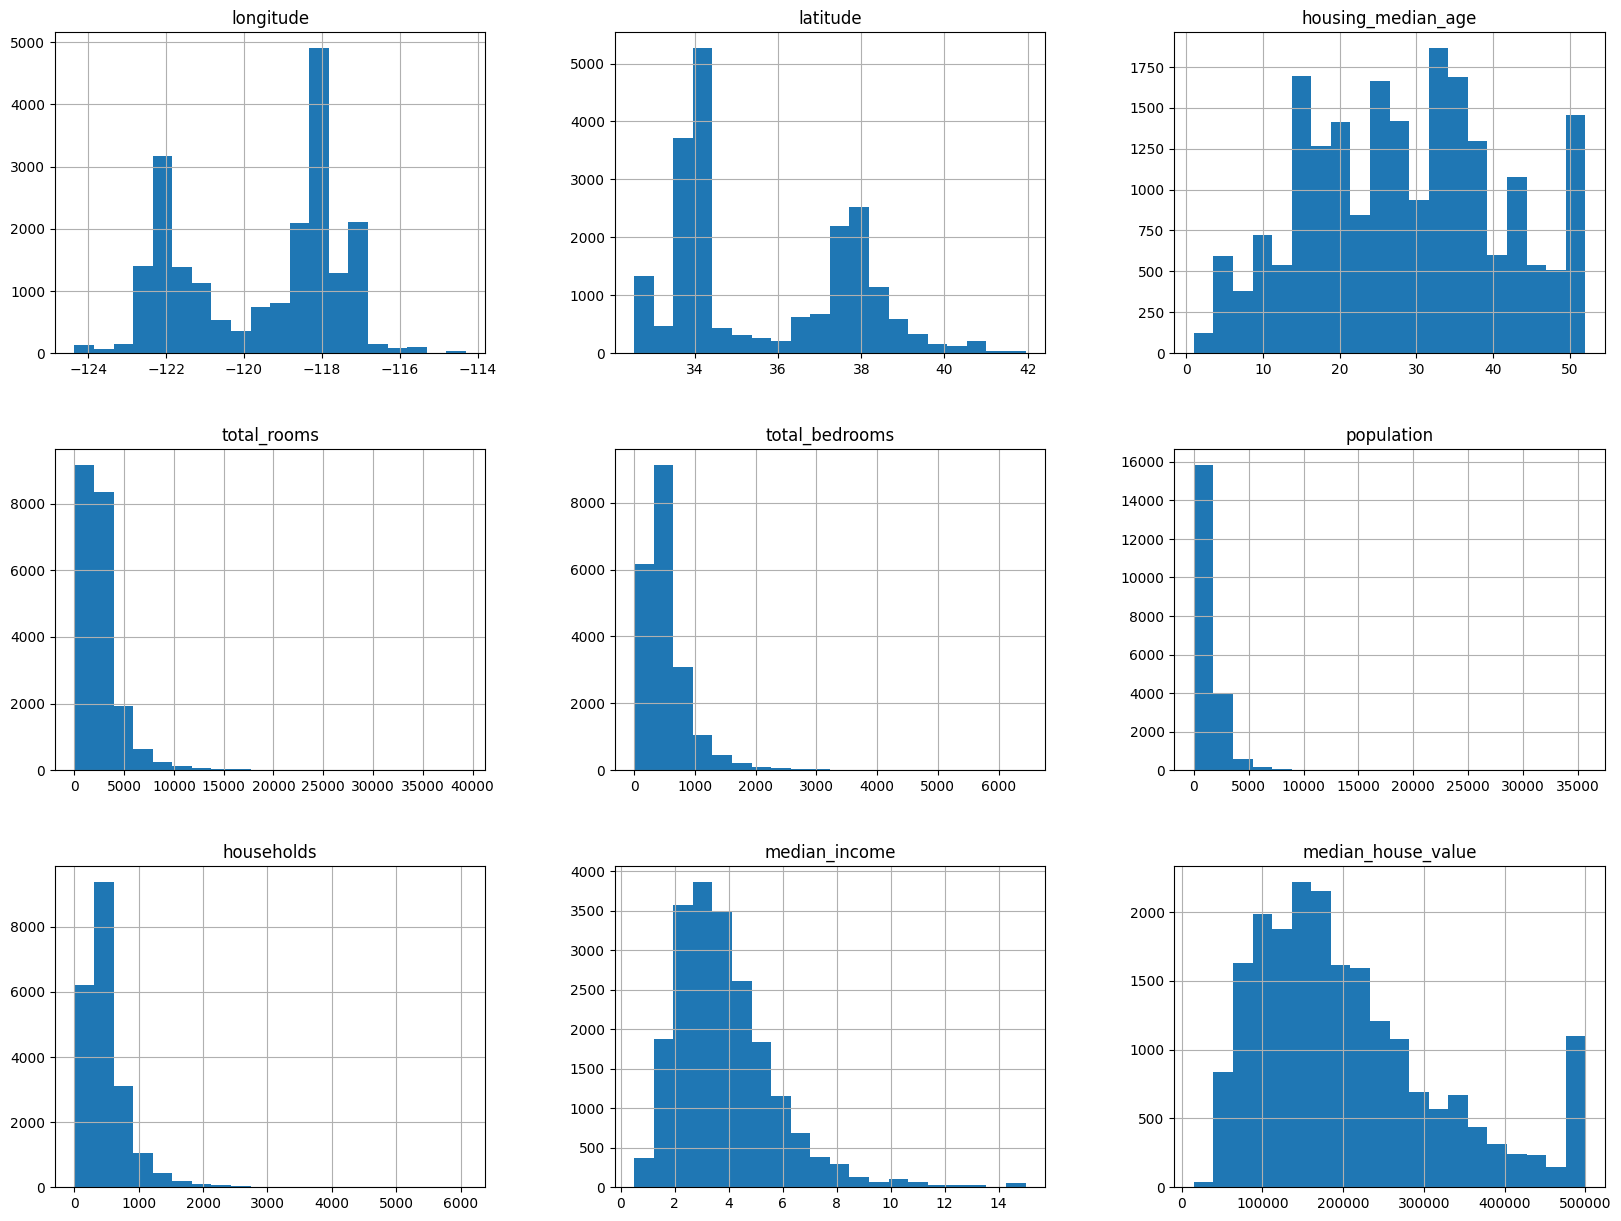

In [12]:
주택.hist(bins = 20, figsize=(20,15)) # 계급의 개수는 약 20개 정도 형성, 이미지 크기를 (20,15) 형태로 생성
plt.show() #이 코드를 작성하지 않으면 추가적인정보도 같이 출력함 

## 데이터 사이언스 분석 툴
#### sklearn -> 머신 러닝에 특화 ->베타에 대한 추론을 하지 않음 , 추정값을 나타냄 
#### statmodels -> 통계 러닝에 특화 -> 베타에 대한 추론 , 표준오차, t값 p값 등을 나타냄 


In [21]:
!pip install scikit-learn statsmodels

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
      --------------------------------------- 0.2/9.2 MB 3.5 MB/s eta 0:00:03
     - -------------------------------------- 0.3/9.2 MB 3.8 MB/s eta 0:00:03
     - -------------------------------------- 0.4/9.2 MB 3.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/9.2 MB 2.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/9.2 MB 2.6 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/9.2 MB 2.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/9.2 MB 1.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/9.2 MB 1.8 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/9.2 MB 1.8 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/9.2 MB 1.6 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/9.2 MB 1.6 MB/s eta 0:00:06
    

#### 학습자료와 검증자료 분리 - 하나는 학습자료로 이용하고 나머지 데이터는 만들어진 모델이 얼마나 좋은지 테스트하기 위해 사용

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(주택,test_size = 0.25, random_state = 316)#75%는 학습자료, 25%는 검증자료로 사용, 데이터는 랜덤으로추출

#### 순서자료로 변환 - 중위소득 범주 변수

In [23]:
import numpy as np

In [26]:
주택['중위소득범주'] = pd.cut(주택['median_income'],bins=[0.0,2,4,6,10,np.inf],labels=[1,2,3,4,5])## 뒷부분 잘림
주택.info() # 넘파이의 무한대 값을 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  중위소득범주              20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


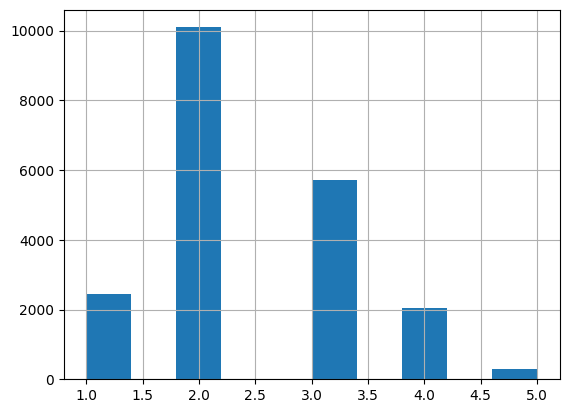

In [27]:
주택['중위소득범주'].hist() # 히스토그램 작성
plt.show()

In [28]:
주택['중위소득범주'].value_counts()# 각 범주에 몇개의 데이터가 있는지 알려줌 

2    10096
3     5725
1     2457
4     2054
5      308
Name: 중위소득범주, dtype: int64

In [29]:
주택['중위소득범주'].value_counts()/len(주택) #전체 개체 숫자를 의미

2    0.489147
3    0.277374
1    0.119041
4    0.099516
5    0.014922
Name: 중위소득범주, dtype: float64

#### 범주형 자료를 숫자로 표시
##### 범주형 = 명목자료 + 순서자료
##### 범주의 수가 2개이면 어떤 자료인지 관계 없음
##### 순서자료: 숫자 순으로 순서 표시
##### 명목자료: 가변수 사용 => one hot  ex)문자형 데이터를 수치형으로 바꾸어 표현하는 것

In [30]:
해변근접성 = 주택[['ocean_proximity']]
해변근접성.head(5)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
가변수처리 = OneHotEncoder()
해변가변수 = 가변수처리.fit_transform(해변근접성)# 우리의 데이터를 가변수로 생성하여 처리함 
해변가변수.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [33]:
가변수처리.categories_ #0번 부터 시작 -> 순서형 자료로 이해 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
##만약 순서자료라면
from sklearn.preprocessing import OrdinalEncoder
순서변환 = OrdinalEncoder()
해변순서 = 순서변환.fit_transform(해변근접성)
해변순서[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

#### 중위소득범주 비율에 맞게 학습-검증 자료 분리

In [37]:
train_범주, test_범주= train_test_split(주택, test_size=0.25, random_state=316, stratify=주택['중위소득범주']) ##소득범주로 나눈 것에 대해서 층화적으로 나누는 작업을 함 (그룹별 분류)

In [38]:
#변수 삭제
주택.drop('중위소득범주', axis=1,inplace=True) # 변수가 필요 없을 경우 drop 으로 제거함
주택.info() # 새로운 값을 수정할 때 "주택 = 주택.xx "이렇게 할 필요없이 inplace를 작성하면 바로 주택이란 변수에 수정값을 넣어줌 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
#결측값 대체
대체주택 = 주택.copy()
결측개수 = 대체주택['total_bedrooms'].isna().sum()# 결측값이 몇개있는지 알려줌 
print(결측개수)

207


In [41]:
대체주택['total_bedrooms'].fillna( 대체주택['total_bedrooms'].median,inplace=True)
결측개수 = 대체주택['total_bedrooms'].isna().sum()# 결측값이 몇개있는지 알려줌 
print(결측개수)

0


In [45]:
!pip install scikit-learn

In [62]:
from sklearn.impute import SimpleImputer

In [64]:
대체방법=SimpleImputer(strategy='median')

In [65]:
#수치변수에 대해서만 적용
주택수치=주택.drop('ocean_proximity', axis=1)

In [66]:
대체방법.fit(주택수치)
대체방법.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [67]:
주택수치.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [68]:
##대체자료는 numpy.ndarray
대체자료=대체방법.transform(주택수치)

In [69]:
대체df = pd.DataFrame(대체자료, columns=주택수치.columns,index=주택수치.index)
대체df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


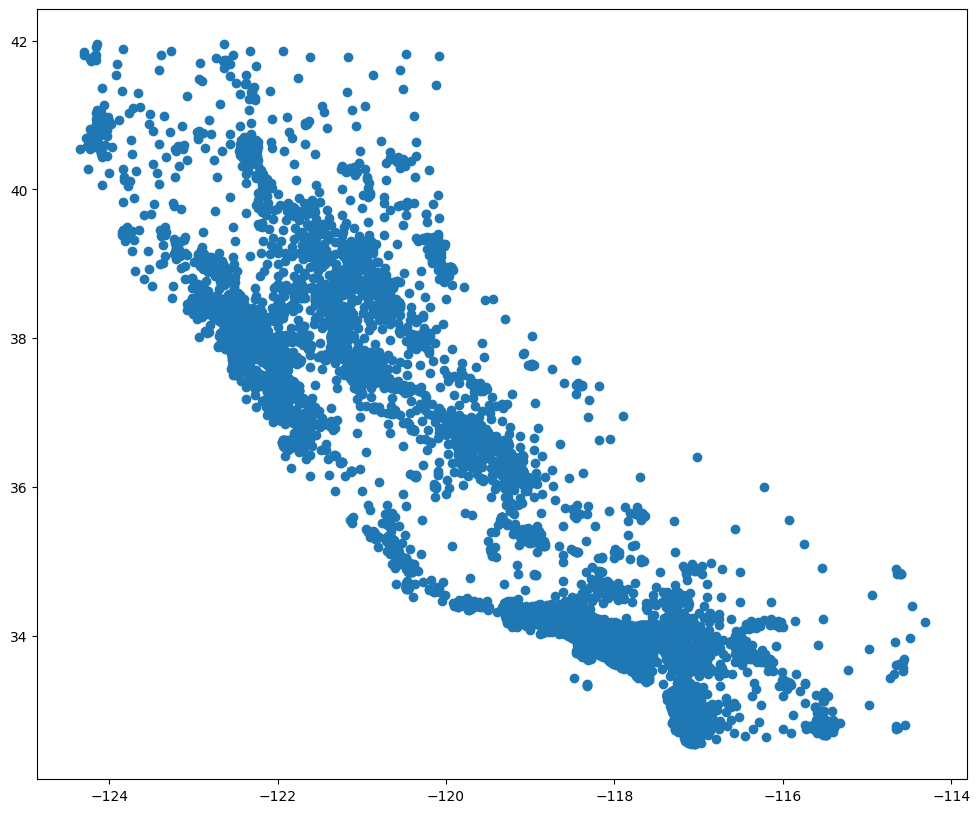

In [70]:
#데이터 시각화
plt.figure(figsize=(12,10))
plt.scatter(주택['longitude'], 주택['latitude'])
plt.show()

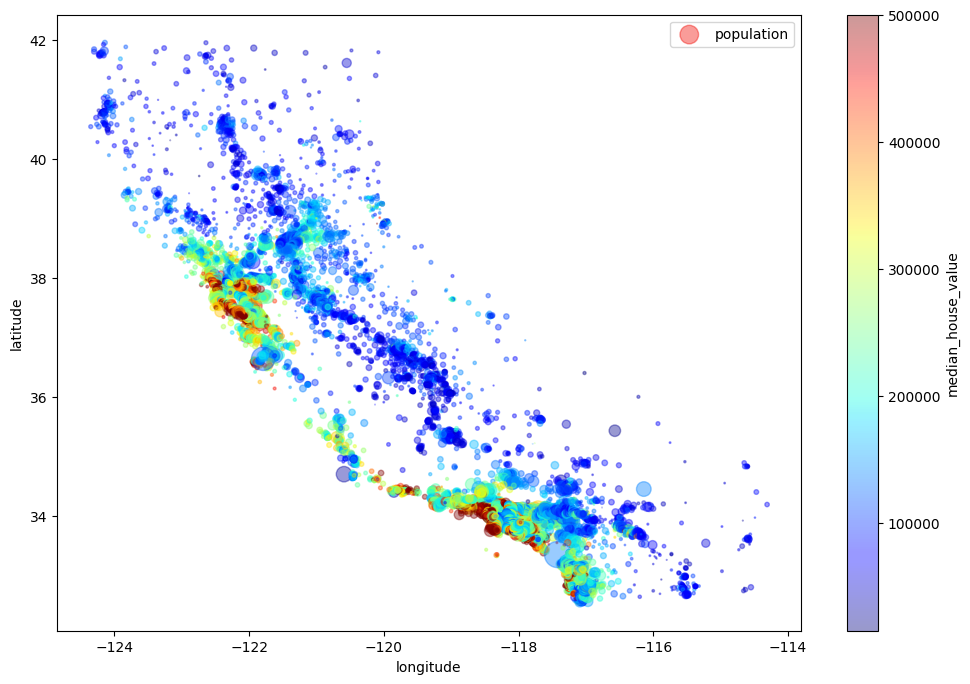

In [75]:
주택.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=주택['population']/100,label='population',
figsize=(12,8), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()
plt.show()

In [77]:
주택.dropna(axis=0, inplace=True)

In [78]:
#회귀분석
y = 주택['median_house_value'] # 주택의 가격을 나타냄 
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [79]:
X일부 = 주택.drop(['median_house_value', 'ocean_proximity'],axis=1)
X일부

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [81]:
X가변수 = pd.DataFrame(해변가변수.toarray(), columns=["11", "12","13","14","15"], index=주택수치.index)
X가변수.drop('11', axis=1, inplace=True)
X가변수

,12,13,14,15
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
20635,1.0,0.0,0.0,0.0
20636,1.0,0.0,0.0,0.0
20637,1.0,0.0,0.0,0.0
20638,1.0,0.0,0.0,0.0


In [83]:
X = pd.merge(X일부,X가변수,left_index=True, right_index=True)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,12,13,14,15
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1.0,0.0,0.0,0.0


In [84]:
from sklearn.linear_model import LinearRegression

In [89]:
선형회귀 = LinearRegression() # 선형 회귀분석을 진행함
선형회귀.fit(X,y)#(설명변수,반응변수) 데이터의 값을 집어넣음

print("절편(bias):", 선형회귀.intercept_)
print("회귀계수(weights):", 선형회귀.coef_)

절편(bias): -2269954.116133064
회귀계수(weights): [ 0.00000000e+00 -2.68129893e+04 -2.54821848e+04  1.07252004e+03
 -6.19326372e+00  1.00556290e+02 -3.79690829e+01  4.96173261e+01
  3.92595729e+04 -3.92843002e+04  1.52901941e+05 -3.95405162e+03
  4.27813432e+03]


In [90]:
선형회귀.predict(X) #예측할 설명변수값을 (독립변수) 함수에 넣어줌 
import statsmodels.api as sm # 데이터를 분석할 도구들이 들어있음
X = sm.add_constant(X) # x값을 추가한 후 x변수를 갱신함

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

print_model = model.summary() # 분석의 요약값이 나타남 
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:38:21   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -2.27e+06    8.8

In [91]:
predictions

0        410542.896335
1        419402.230650
2        379874.191424
3        322215.770338
4        255727.964267
             ...      
20635     31165.622301
20636     57062.892607
20637     39303.331192
20638     50351.139250
20639     67599.024031
Length: 20433, dtype: float64